# Logistic Regression for Diabetes Prediction

In [58]:
#import applicable packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Step 1: Describe the Problem

We want to use the features in this kaggle healthcare dataset https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?resource=download to predict on the "Outcome" column 0/1 for diabetes prediction using Linear Regression. Having a binary classifier makes this a great Logistic Regression test!

## Step 2: Explore the Data

In [9]:
#load dataset
df = pd.read_csv("Healthcare-Diabetes.csv", encoding = 'latin-1' )
#briefly see stats about the data columns
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
#sneak peak at the data
df.head() 

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [16]:
#see most common occurances especially for our Outcome response var, this suggests stratification
df["Outcome"].mode()

0    0
Name: Outcome, dtype: int64

## Step 3: Scale & Split the data

Now that we have taken a look at our dataset, its time to create our X and y variables as well as scale our data as Logistic Regression is sensitive to feature scale due to is use of regularization. By default LR uses the L2.

#### L2 (Ridge, default)

Penalizes the sum of squares of coefficients.

Shrinks weights but does not force them to 0.

Keeps all features but with reduced impact.

#### L1 (Lasso)

Penalizes the sum of absolute values of coefficients.

Can force some coefficients to 0 → performs feature selection.

#### Elastic Net

Combines L1 + L2 penalties.

Balance controlled by l1_ratio.

In [15]:
#extract response column and separate it from our features
X = df.drop(columns = ["Outcome"])
y = df["Outcome"]
#scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#split our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                   test_size = 0.2,
                                                   random_state = 42,
                                                   stratify = y
                                                    )

## Step 4: Fit our model!

In [24]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## Step 5: Accuracy!

In [38]:
y_pred = lr.predict(X_test)
#true labels against predictions
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7707581227436823


In [41]:
#Accuracy looks great! Now for the classificaiton report or conf matrix!
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       363
           1       0.72      0.54      0.62       191

    accuracy                           0.77       554
   macro avg       0.76      0.72      0.73       554
weighted avg       0.77      0.77      0.76       554



In [52]:
#AUC AND ROC
#predict probabilities
y_probs = lr.predict_proba(X_test)[:,1]
#see the roc auc score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.3f}")

ROC AUC Score: 0.836


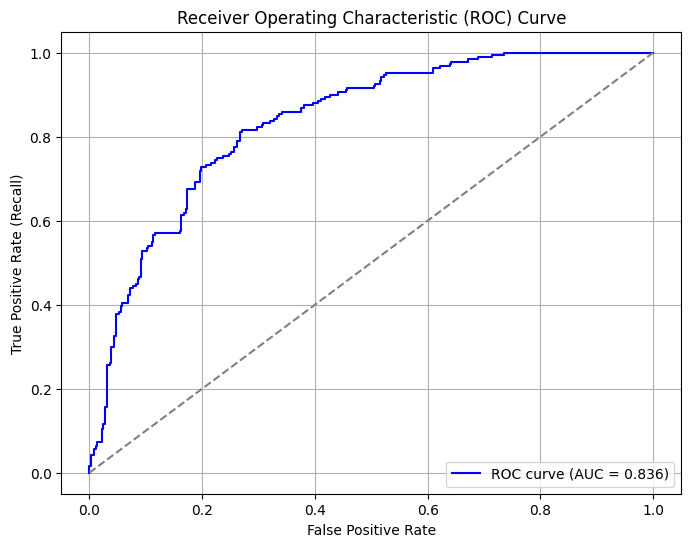

In [59]:
#lets visualize it!
# Compute ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='grey')  # diagonal line = random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Conclusion

After tring Linear Regression on this same dataset, we saw a low R2 and RMSE score. This led us to try Logistic Regression, which performs better on the dataset due to its strength with binary classification as is the case with the response column "Outcome". This makes Logistic Regression a great model for this approach. Other models that work well and could be tested against this dataset would be SVM, 